## import all needed liberary

In [722]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
from skimage.exposure import equalize_adapthist 
from skimage import filters
from skimage import measure
from skimage.draw import polygon
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2
from skimage.draw import rectangle
import imutils
from skimage.exposure import histogram
from matplotlib.pyplot import bar


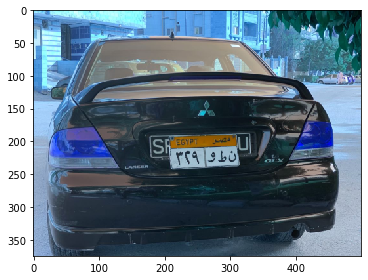

In [734]:
img_data1 =cv2.imread("dataset\data20.jpeg")
img_data1 = imutils.resize(img_data1 , width = 500)
io.imshow(img_data1)


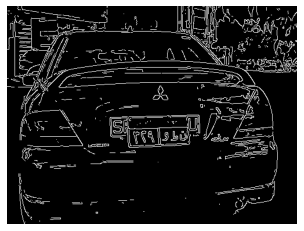

[[233 228 227 ...  10  11  10]
 [234 227 219 ...  10  11  10]
 [229 228 220 ...  10  11  10]
 ...
 [182 185 186 ... 184 182 192]
 [180 181 181 ... 188 166 172]
 [178 184 180 ... 187 186 180]]


In [735]:
def show_image (img):
    fig = plt.figure()
    plt.gray()
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def image_preprocessing (img):
    '''
        in this function we are going to applying different preprocessing 
        techniques in the input image 

        prams:
                img 
    '''
    gray= cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)    # convert image to grayscale 
    #gray = cv2.bilateralFilter(gray_img, 11, 17, 17)
    edged = cv2.Canny(gray, 170, 200)
    
    #equalized_image = equalize_adapthist(gray_img) # applaying histogram equalization 
    #edged = Sobel(gray) # applaying edge detection using sobel algorithm  
    # we need to discuss the best way to get the best threshold 
    #result = ((edged >0.1))  # convert image to binary using thresholding value 
    return edged , gray


preprocessed_img  , gray_img= image_preprocessing(img_data1)
show_image(preprocessed_img)
io.imsave('result1.jpg' , preprocessed_img)
print(gray_img)

In [736]:
def edge_img_processing(edge_img , img ):
    #Thresholding:
    #gray = cv2.cvtColor(edge_img, cv2.COLOR_BGR2GRAY)
    #T, edge_img_t = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)
    edge_img_t=edge_img
    #Finding contours (only need the external contour):
    cnts, _ = cv2.findContours(edge_img_t, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    #cnts=sorted(cnts, key = cv2.contourArea, reverse = false)[:50] 

    plates = []
    for i, c in enumerate(cnts):
        x,y,w,h = cv2.boundingRect(c)
        area = w *h 
        aspect_ratio = w/h 
        plate = img[y:y+h, x:x+w]
        window =img_data1[y:y+h, x:x+w]
        avg_blue_ch = np.sum(window[:,:,2])/ (w*h)              
        avg_red_ch = np.sum(window[:,:,0])/ (w*h)  
        avg_green_ch = np.sum(window[:,:,1])/ (w*h)              

        if (1.6< aspect_ratio < 2.7 and area >2000 and area < 5000 and avg_red_ch >110 and avg_green_ch>100 and avg_blue_ch>100):
                print(i ,avg_red_ch ,avg_green_ch,avg_blue_ch)
                print (aspect_ratio , area)
                
        
                ints = 0
                sz = np.shape(plate)
                print (sz)
                for j in range (0,sz[0]):
                    for k in range (0,sz[1]):
                            ints = ints+plate[j][k]

                    #print (ints)
                smin = sz[0]*sz[1]*255*0.4
                smax = sz[0]*sz[1]*255*0.9
                plates.append(img_data1[y-7:y+h+7, x-7:x+w+7])
                #cv2.rectangle(img_data1, (x, y), (x + w, y + h), (100,0,0), 1)
            
            #print (ints,sm , plate[0])
           # if (ints > smin and ints < smax):
             

            

    #plates.sort(key=lambda by_x: by_x[1])
    #Writing the found contour into a folder
    
    print ("ssszzz")
    print (len(plates))
    for i, char in enumerate(plates):
        cv2.imwrite(f'Scannedplates/Char{i}.jpg', char )

    return  edge_img_t , img, plates

edge_img , img ,plates= edge_img_processing(preprocessed_img , gray_img)
print(np.array(plates).shape)
cv2.waitKey()

208 132.20725623582766 139.96077097505668 133.05192743764172
2.5 4410
(42, 105)
ssszzz
1
(1, 56, 119, 3)


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1334: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [737]:
plate1 = cv2.imread('Scannedplates/Char1.jpg')



In [19]:
def contours_evaluation(contour):
    pass
    


In [20]:
def Hough_Transform (img):
    img_shape = img.shape
    # image width and height
    x_max = img_shape[0]
    y_max = img_shape[1]
    
    theta_max = 1.0 * math.pi
    theta_min = 0.0
    
    r_min =0 
    r_max = math.hypot(x_max ,y_max)
    
    r_dim =200
    theta_dim =300
    
    houghSpace = np.zeros((r_dim , theta_dim))
    
    for x in range (x_max):
        for y in range(y_max):
            if img[x,y] ==0:continue
            for itheta  in range (theta_dim):
                theta = 1.0 *  itheta * theta_max /  theta_dim
                r = x * np.cos(theta) + y * np.sin(theta)
                ir = r_dim * (1.0 * r) /r_max
                
                houghSpace[np.round(ir).astype('int'),np.round(itheta).astype('int')]=  houghSpace[np.round(ir).astype('int'),np.round(itheta).astype('int')]+1
 
Hough_Transform(contours_image)               
    
    

NameError: name 'contours_image' is not defined

In [ ]:
  '''
    ax.imshow(contours_image)
    for contour in contours:
            rr, cc = polygon(contour[:, 0], contour[:, 1], contours_image.shape)
            contours_image[rr, cc] = 0

            ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    ax.axis('Image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()
    '''